In [20]:
# Importing useful packages
import numpy as np
from scipy import stats
import pandas as pd
import sklearn as sk
import seaborn as sb
import datetime as dt
import pylab 
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from new_var import calc,y1function,y2function,C3function,C6function
from outliers import outlier

%matplotlib inline
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.cross_validation import train_test_split

ipo_data = pd.read_excel("Competition #1 Raw Data_UPDATED I3.xlsx",header=0,na_values='-' )
# Replacing NaN values with their corresponding mean value

ipo_data=ipo_data.fillna(ipo_data.mean())


# Removing 0 and negatives for T' calculations        
ipo_data['T2']=ipo_data['T2'].mask(ipo_data['T2'] <= 0,ipo_data['T2'].mean())
ipo_data['T1']=ipo_data['T1'].mask(ipo_data['T1'] <= 0,ipo_data['T1'].mean())
ipo_data['T3']=ipo_data['T3'].mask(ipo_data['T3'] <= 0,ipo_data['T3'].mean())
ipo_data['T4']=ipo_data['T4'].mask(ipo_data['T4'] <= 0,ipo_data['T4'].mean())
ipo_data['T5']=ipo_data['T5'].mask(ipo_data['T5'] <= 0,ipo_data['T5'].mean())
ipo_data['S1']=ipo_data['S1'].mask(ipo_data['S1'] <= 0,ipo_data['S1'].mean())
ipo_data.describe()


,I3,P(IPO),P(H),P(L),P(1Day),C1,C2,C3,C4,C5,C6,C7,T1,T2,T3,T4,T5,S1,S2,S3
count,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,6.820000e+02,6.820000e+02,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.00000,682.000000,682.000000
mean,4851.573314,13.837666,15.481190,13.515045,25.934766,149.728788,0.859091,1.788904,0.007282,4.935776e+07,1.241519e+07,500.459962,465.634361,12796.021729,11445.972694,295.217099,680.217655,68.52323,120.104258,144.759178
std,2065.497876,6.031467,6.604398,5.792641,72.042293,150.328785,0.342521,158.308600,0.032775,1.039156e+08,2.501761e+07,1558.767222,175.612567,5401.439280,4776.337830,120.388060,471.846488,38.97700,84.766654,69.225403
min,100.000000,3.000000,0.000000,3.000000,0.000000,10.000000,0.000000,-786.239000,-0.162352,3.693227e+06,5.250000e+05,0.074000,132.000000,527.000000,3003.000000,70.000000,167.000000,5.00000,20.000000,26.000000
25%,3175.250000,10.000000,13.000000,11.000000,11.092500,85.000000,1.000000,-0.750000,-0.013352,1.874682e+07,5.004180e+06,41.511500,351.250000,9213.250000,8238.500000,214.000000,463.250000,45.00000,73.000000,100.000000
50%,3881.000000,13.500000,15.481190,13.000000,15.000000,110.000000,1.000000,0.070000,0.007282,2.759165e+07,7.500000e+06,134.738000,444.500000,12064.000000,10811.000000,280.000000,625.500000,60.00000,100.500000,134.000000
75%,7371.000000,17.000000,17.000000,15.000000,21.030001,152.750000,1.000000,0.600000,0.030941,4.938184e+07,1.208721e+07,500.459962,550.750000,15240.250000,13751.500000,353.750000,794.500000,84.75000,141.750000,173.000000
max,8742.000000,85.000000,135.000000,108.000000,1159.200562,2087.000000,1.000000,3864.500000,0.092896,2.138085e+09,4.212336e+08,30683.000000,1750.000000,49056.000000,43952.000000,1058.000000,10277.000000,309.00000,944.000000,883.000000


In [21]:
ipo_data['Y1'] = ipo_data.apply(y1function, axis=1)
ipo_data['Y2'] = ipo_data.apply(y2function, axis=1)
ipo_data['C3x'] = ipo_data.apply(C3function, axis=1)
ipo_data['C6x'] = ipo_data.apply(C6function, axis=1)
calc(ipo_data)
del ipo_data['C3']
del ipo_data['C5']
del ipo_data['C6']
del ipo_data['T1']
del ipo_data['T2']
del ipo_data['T3']
del ipo_data['T4']
del ipo_data['T5']
del ipo_data['S1']
del ipo_data['S2']
del ipo_data['S3']
ipo_data.describe()


,I3,P(IPO),P(H),P(L),P(1Day),C1,C2,C4,C7,Y1,Y2,C3x,C6x,C5x,T3x,T4x,T5x,S1x,S2x,S3x
count,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000
mean,4851.573314,13.837666,15.481190,13.515045,25.934766,149.728788,0.859091,0.007282,500.459962,0.513196,0.708211,0.536657,0.052708,4.627711,0.918940,0.629873,0.080693,0.005504,0.009179,0.011854
std,2065.497876,6.031467,6.604398,5.792641,72.042293,150.328785,0.342521,0.032775,1558.767222,0.500193,0.454919,0.499020,0.107639,6.245584,0.624282,0.076265,0.744766,0.004784,0.004324,0.008970
min,100.000000,3.000000,0.000000,3.000000,0.000000,10.000000,0.000000,-0.162352,0.074000,0.000000,0.000000,0.000000,0.000000,0.283223,0.703925,0.395480,0.031595,0.001389,0.002152,0.005125
25%,3175.250000,10.000000,13.000000,11.000000,11.092500,85.000000,1.000000,-0.013352,41.511500,0.000000,0.000000,0.000000,0.000000,2.853439,0.883578,0.580815,0.047413,0.004154,0.007031,0.009570
50%,3881.000000,13.500000,15.481190,13.000000,15.000000,110.000000,1.000000,0.007282,134.738000,1.000000,1.000000,1.000000,0.000000,3.770051,0.897133,0.629077,0.051901,0.005069,0.008600,0.011305
75%,7371.000000,17.000000,17.000000,15.000000,21.030001,152.750000,1.000000,0.030941,500.459962,1.000000,1.000000,1.000000,0.071429,4.865080,0.909732,0.674852,0.056471,0.006258,0.010535,0.012883
max,8742.000000,85.000000,135.000000,108.000000,1159.200562,2087.000000,1.000000,0.092896,30683.000000,1.000000,1.000000,1.000000,1.000000,99.787255,17.165085,1.443089,19.500949,0.121442,0.091082,0.233397


In [22]:
ipo_data.C6x = ipo_data.C6x.astype(float)

ipo_data.C2 = ipo_data.C2.astype(int)
print(ipo_data.dtypes)


I1          object
I2          object
I3           int64
P(IPO)     float64
P(H)       float64
P(L)       float64
P(1Day)    float64
C1         float64
C2           int32
C4         float64
C7         float64
Y1           int64
Y2           int64
C3x          int64
C6x        float64
C5x        float64
T3x        float64
T4x        float64
T5x        float64
S1x        float64
S2x        float64
S3x        float64
dtype: object


In [23]:
sqrt_transform=['C6x','T3x','T5x','S1x','S2x','S3x'] #Variables that need to be square rooted
ipo_data[sqrt_transform]=ipo_data[sqrt_transform]**0.5 #square rooting variable

log_transform=['C1','C7'] #Variables to be log transformed
ipo_data[log_transform]=np.log(ipo_data[log_transform])#log transformation


def standard(data,method):
    if data.dtype == float : #Making sure data isnt a string or int
        if method == 1:
            X_std = (data - data.min(axis=0)) / (data.max(axis=0) - data.min(axis=0))
            data = X_std * (1 - 0) + 0
            return data
train=['C3x','C4','C1','C7','C6x','T3x','T4x','T5x','S1x','S2x','S3x','C2']
#normal_col=['C4','C1','C7','C6x','T3x','T4x','T5x','S1x','S2x','S3x']
from sklearn import preprocessing


In [24]:
df_subset = ipo_data.loc[ipo_data['Y2'] == 1].sample(300)
ipo_data = ipo_data.drop(df_subset.index)


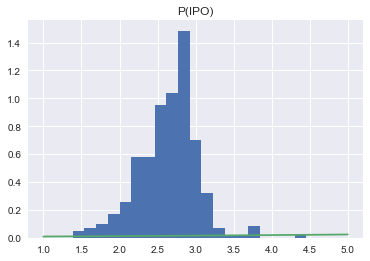

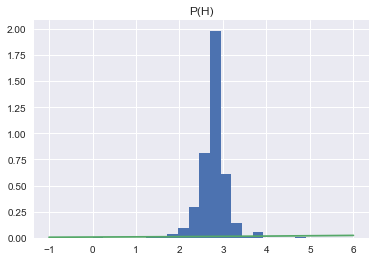

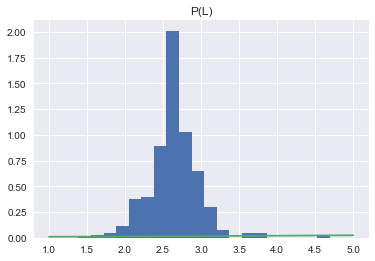

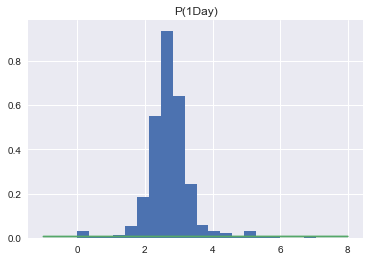

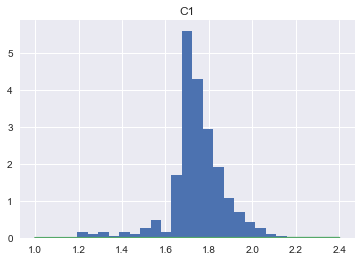

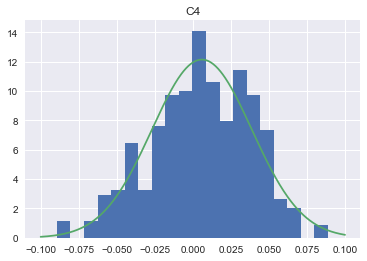

C:\Users\conor\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


ValueError: max must be larger than min in range parameter.

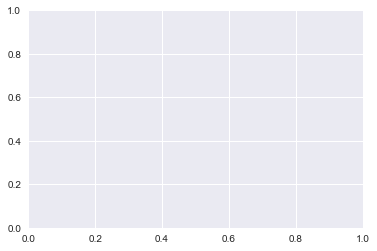

In [25]:
for i in range(len(ipo_data.columns)):
    if ipo_data.iloc[:,i].dtype == float:
        plt.hist(np.log(ipo_data.iloc[:,i]+1),bins=20,normed=True)
        xt = plt.xticks()[0]  
        xmin, xmax = min(xt), max(xt)  
        lnspc = np.linspace(xmin, xmax, len(ipo_data.iloc[:,i]))
        plt.title('%s' % ipo_data.columns[i])
        # lets try the normal distribution first
        m, s = stats.norm.fit(ipo_data.iloc[:,i]) # get mean and standard deviation  
        pdf_g = stats.norm.pdf(lnspc, m, s) # now get theoretical values in our interval  
        plt.plot(lnspc, pdf_g, label="Norm")
        plt.show()

C:\Users\conor\Documents\Fairfield College\IS540 Data Mining\Competitions\IS540-Code\Python for Comp 1\outliers.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[outlier_lower] = mean-3*std
C:\Users\conor\Documents\Fairfield College\IS540 Data Mining\Competitions\IS540-Code\Python for Comp 1\outliers.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[outlier_upper] = mean+3*std


Outlier Method 1; Standardise Method 1
Optimization terminated successfully.
         Current function value: 0.639334
         Iterations 5
[ True  True  True  True  True  True  True  True  True  True  True  True]
[1 1 1 1 1 1 1 1 1 1 1 1]
                           Logit Regression Results                           
Dep. Variable:                     Y2   No. Observations:                  382
Model:                          Logit   Df Residuals:                      370
Method:                           MLE   Df Model:                           11
Date:                Sun, 11 Feb 2018   Pseudo R-squ.:                 0.07647
Time:                        16:06:07   Log-Likelihood:                -244.23
converged:                       True   LL-Null:                       -264.45
                                        LLR p-value:                 3.004e-05
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------

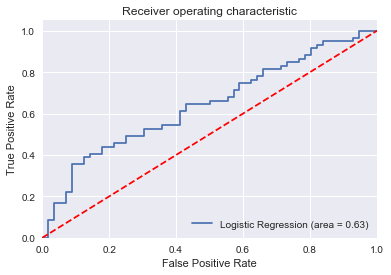

C:\Users\conor\Documents\Fairfield College\IS540 Data Mining\Competitions\IS540-Code\Python for Comp 1\outliers.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[outlier_lower] = mean
C:\Users\conor\Documents\Fairfield College\IS540 Data Mining\Competitions\IS540-Code\Python for Comp 1\outliers.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[outlier_upper] = mean


Outlier Method 2; Standardise Method 1
Optimization terminated successfully.
         Current function value: 0.635483
         Iterations 5
[ True  True  True  True  True  True  True  True  True  True  True  True]
[1 1 1 1 1 1 1 1 1 1 1 1]
                           Logit Regression Results                           
Dep. Variable:                     Y2   No. Observations:                  382
Model:                          Logit   Df Residuals:                      370
Method:                           MLE   Df Model:                           11
Date:                Sun, 11 Feb 2018   Pseudo R-squ.:                 0.08203
Time:                        16:06:09   Log-Likelihood:                -242.75
converged:                       True   LL-Null:                       -264.45
                                        LLR p-value:                 9.305e-06
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------

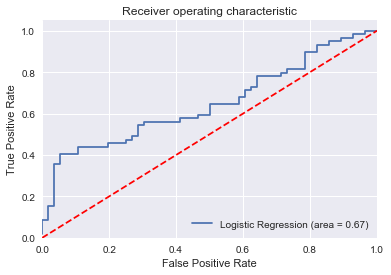

C:\Users\conor\Documents\Fairfield College\IS540 Data Mining\Competitions\IS540-Code\Python for Comp 1\outliers.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[outlier_lower] = mean
C:\Users\conor\Documents\Fairfield College\IS540 Data Mining\Competitions\IS540-Code\Python for Comp 1\outliers.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[outlier_upper] = mean


Outlier Method 3; Standardise Method 1
Optimization terminated successfully.
         Current function value: 0.634463
         Iterations 5
[ True  True  True  True  True  True  True  True  True  True  True  True]
[1 1 1 1 1 1 1 1 1 1 1 1]
                           Logit Regression Results                           
Dep. Variable:                     Y2   No. Observations:                  382
Model:                          Logit   Df Residuals:                      370
Method:                           MLE   Df Model:                           11
Date:                Sun, 11 Feb 2018   Pseudo R-squ.:                 0.08350
Time:                        16:06:11   Log-Likelihood:                -242.36
converged:                       True   LL-Null:                       -264.45
                                        LLR p-value:                 6.801e-06
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------

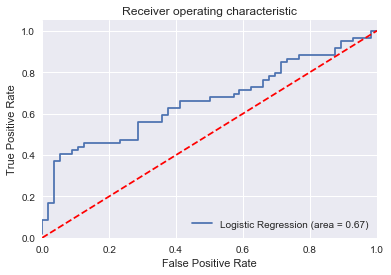

C:\Users\conor\Documents\Fairfield College\IS540 Data Mining\Competitions\IS540-Code\Python for Comp 1\outliers.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[outlier_lower] = lq
C:\Users\conor\Documents\Fairfield College\IS540 Data Mining\Competitions\IS540-Code\Python for Comp 1\outliers.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[outlier_upper] = uq


Outlier Method 4; Standardise Method 1
Optimization terminated successfully.
         Current function value: 0.634634
         Iterations 5
[ True  True  True  True  True  True  True  True  True  True  True  True]
[1 1 1 1 1 1 1 1 1 1 1 1]
                           Logit Regression Results                           
Dep. Variable:                     Y2   No. Observations:                  382
Model:                          Logit   Df Residuals:                      370
Method:                           MLE   Df Model:                           11
Date:                Sun, 11 Feb 2018   Pseudo R-squ.:                 0.08326
Time:                        16:06:13   Log-Likelihood:                -242.43
converged:                       True   LL-Null:                       -264.45
                                        LLR p-value:                 7.168e-06
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------

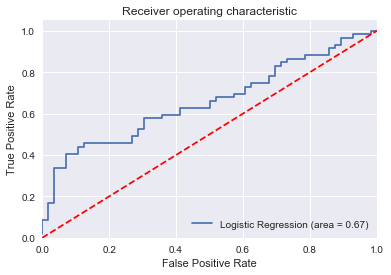

In [26]:


for j in range(1,5):
    x=pd.DataFrame.copy(ipo_data)
    for i in range(len(x.columns)): 
        if x.iloc[:,i].dtype == float:
            outlier(x.iloc[:,i],j)             
            if x.iloc[:,i].dtype == float:   
                x.iloc[:,i]=standard(x.iloc[:,i],1)
    print('Outlier Method {}; Standardise Method {}'.format(j,1))
    
    logreg = LogisticRegression()
    #train=['C4','C6x','T4x','S2x']
    train=['C3x','C4','C1','C7','C6x','T3x','T4x','T5x','S1x','S2x','S3x','C2']
    X=x[train]
    y=x['Y2']
    rfe = RFE(logreg, 18)
    rfe = rfe.fit(X,y)

    logit_model=sm.Logit(x['Y2'],x[train])
    result=logit_model.fit()

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
    logreg = LogisticRegression()
    logreg.fit(X_train, y_train)
    y_pred = logreg.predict(X_test)

    kfold = model_selection.KFold(n_splits=10, random_state=7)
    modelCV = LogisticRegression()
    scoring = 'accuracy'
    results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
    #confusion_matrix = confusion_matrix(y_test, y_pred)

    print(rfe.support_)
    print(rfe.ranking_)
    print(result.summary())
    print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))
    print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

    print(confusion_matrix)
    print(classification_report(y_test, y_pred))

    logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
    fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
    plt.figure()
    plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.savefig('Log_ROC')
    plt.show()

In [19]:
# logreg = LogisticRegression()
# train=['C3x','C4','C1','C7','C6x','T3x','T4x','T5x','S1x','S2x','S3x','C2']
# X=ipo_data[train]
# y=ipo_data['Y1']
# rfe = RFE(logreg, 18)
# rfe = rfe.fit(X,y)

# logit_model=sm.Logit(ipo_data['Y1'],ipo_data[train])
# #result=logit_model.fit()

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
# logreg = LogisticRegression()
# logreg.fit(X_train, y_train)
# y_pred = logreg.predict(X_test)

# kfold = model_selection.KFold(n_splits=10, random_state=7)
# modelCV = LogisticRegression()
# scoring = 'accuracy'
# results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
# confusion_matrix = confusion_matrix(y_test, y_pred)

# print(rfe.support_)
# print(rfe.ranking_)
# print(result.summary())
# print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))
# print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

# print(confusion_matrix)
# print(classification_report(y_test, y_pred))

# logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
# fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
# plt.figure()
# plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
# plt.plot([0, 1], [0, 1],'r--')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Receiver operating characteristic')
# plt.legend(loc="lower right")
# plt.savefig('Log_ROC')
# plt.show()

In [57]:
ipo_data.corr(method='spearman').style.format("{:.2}").background_gradient(cmap=plt.get_cmap('bwr'), axis=1)

,P(IPO),P(H),P(L),P(1Day),C1,C2,C4,C7,Y1,Y2,C3x,C6x,C5x,T3x,T4x,T5x,S1x,S2x,S3x
P(IPO),1.0,0.82,0.82,0.61,-0.055,0.32,-0.021,0.4,-0.49,0.043,0.25,0.49,-0.017,-0.11,-0.0077,-0.092,-0.057,0.017,-0.041
P(H),0.82,1.0,1.0,0.44,-0.075,0.32,-0.068,0.49,-0.077,-0.11,0.21,0.068,-0.05,-0.071,0.071,-0.049,0.043,0.079,-0.05
P(L),0.82,1.0,1.0,0.45,-0.069,0.33,-0.071,0.49,-0.077,-0.11,0.21,0.073,-0.059,-0.076,0.069,-0.049,0.049,0.088,-0.051
P(1Day),0.61,0.44,0.45,1.0,-0.023,0.18,0.023,0.23,-0.38,0.5,0.093,0.37,0.061,-0.03,0.014,-0.078,-0.026,-0.03,0.054
C1,-0.055,-0.075,-0.069,-0.023,1.0,-0.073,0.059,0.006,0.0041,-0.012,0.015,0.036,0.031,-0.066,0.093,0.023,0.072,0.067,-0.014
C2,0.32,0.32,0.33,0.18,-0.073,1.0,-0.072,0.19,-0.084,0.023,-0.058,0.12,0.019,0.0029,0.033,0.16,0.069,0.002,0.068
C4,-0.021,-0.068,-0.071,0.023,0.059,-0.072,1.0,-0.074,-0.082,0.14,-0.029,0.12,-0.04,0.12,0.11,0.1,6.6e-05,-0.042,0.11
C7,0.4,0.49,0.49,0.23,0.006,0.19,-0.074,1.0,-0.043,-0.033,0.27,0.017,-0.045,-0.09,0.053,-0.083,0.1,0.19,-0.037
Y1,-0.49,-0.077,-0.077,-0.38,0.0041,-0.084,-0.082,-0.043,1.0,-0.27,-0.14,-0.75,-0.074,0.1,0.075,0.12,0.15,0.17,0.031
Y2,0.043,-0.11,-0.11,0.5,-0.012,0.023,0.14,-0.033,-0.27,1.0,0.044,0.29,0.13,-0.018,-0.021,-0.021,-0.018,-0.13,0.038


In [64]:
for j in range(1,5): 
    for i in range(len(x.columns)): 
        if x.iloc[:,i].dtype == float:
            outlier(x.iloc[:,i],j)
    print(x.describe())

C:\Users\conor\Documents\Fairfield College\IS540 Data Mining\Competitions\IS540-Code\Python for Comp 1\outliers.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[outlier_lower] = mean-3*std
C:\Users\conor\Documents\Fairfield College\IS540 Data Mining\Competitions\IS540-Code\Python for Comp 1\outliers.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[outlier_upper] = mean+3*std


           P(IPO)        P(H)        P(L)     P(1Day)          C1          C2  \
count  682.000000  682.000000  682.000000  682.000000  682.000000  682.000000   
mean    13.672646   15.277467   13.335060   22.382172  143.625749    0.831378   
std      5.031353    4.524586    4.237828   31.555522  109.745034    0.374692   
min      3.000000    0.000000    3.000000    0.000000   10.000000    0.000000   
25%     10.000000   13.000000   11.000000   11.092500   85.000000    1.000000   
50%     13.500000   15.481190   13.000000   15.000000  110.000000    1.000000   
75%     17.000000   17.000000   15.000000   21.030001  152.750000    1.000000   
max     31.932066   35.294384   30.892968  242.061645  600.715144    1.000000   

               C4           C7          Y1          Y2         C3x  \
count  682.000000   682.000000  682.000000  682.000000  682.000000   
mean     0.007389   432.224527    0.513196    0.708211    0.529326   
std      0.032336   838.320379    0.500193    0.454919    0.

C:\Users\conor\Documents\Fairfield College\IS540 Data Mining\Competitions\IS540-Code\Python for Comp 1\outliers.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[outlier_lower] = mean
C:\Users\conor\Documents\Fairfield College\IS540 Data Mining\Competitions\IS540-Code\Python for Comp 1\outliers.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[outlier_upper] = mean


           P(IPO)        P(H)        P(L)     P(1Day)          C1          C2  \
count  682.000000  682.000000  682.000000  682.000000  682.000000  682.000000   
mean    13.388105   15.010999   13.073235   18.128075  129.173645    0.831378   
std      4.493202    3.840556    3.685555   13.733102   74.627892    0.374692   
min      3.000000    3.000000    3.000000    0.000000   10.000000    0.000000   
25%     10.000000   13.000000   11.000000   11.092500   85.000000    1.000000   
50%     13.500000   15.277467   13.000000   15.000000  110.000000    1.000000   
75%     16.500000   17.000000   15.000000   21.030001  149.728788    1.000000   
max     28.000000   27.000000   24.000000  116.000000  461.000000    1.000000   

               C4           C7          Y1          Y2         C3x  \
count  682.000000   682.000000  682.000000  682.000000  682.000000   
mean     0.007678   315.931459    0.513196    0.708211    0.529326   
std      0.031891   456.675807    0.500193    0.454919    0.

C:\Users\conor\Documents\Fairfield College\IS540 Data Mining\Competitions\IS540-Code\Python for Comp 1\outliers.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[outlier_lower] = mean
C:\Users\conor\Documents\Fairfield College\IS540 Data Mining\Competitions\IS540-Code\Python for Comp 1\outliers.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[outlier_upper] = mean


           P(IPO)        P(H)        P(L)     P(1Day)          C1          C2  \
count  682.000000  682.000000  682.000000  682.000000  682.000000  682.000000   
mean    13.303871   14.951382   12.922738   15.715259  114.304889    0.831378   
std      4.355356    3.198553    3.233652    6.434602   44.326053    0.374692   
min      3.000000    7.000000    5.000000    0.000000   10.000000    0.000000   
25%     10.000000   13.000000   11.000000   11.092500   85.000000    1.000000   
50%     13.500000   15.010999   13.073235   15.000000  110.000000    1.000000   
75%     16.000000   17.000000   15.000000   19.507500  140.000000    1.000000   
max     26.000000   23.000000   21.000000   35.919998  244.000000    1.000000   

               C4           C7          Y1          Y2         C3x  \
count  682.000000   682.000000  682.000000  682.000000  682.000000   
mean     0.008612   230.228606    0.513196    0.708211    0.529326   
std      0.030514   234.599317    0.500193    0.454919    0.

C:\Users\conor\Documents\Fairfield College\IS540 Data Mining\Competitions\IS540-Code\Python for Comp 1\outliers.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[outlier_lower] = lq
C:\Users\conor\Documents\Fairfield College\IS540 Data Mining\Competitions\IS540-Code\Python for Comp 1\outliers.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[outlier_upper] = uq


           P(IPO)        P(H)        P(L)     P(1Day)          C1          C2  \
count  682.000000  682.000000  682.000000  682.000000  682.000000  682.000000   
mean    13.289208   14.951382   12.922738   15.532986  112.074683    0.831378   
std      4.329305    3.198553    3.233652    6.093746   40.393520    0.374692   
min      3.000000    7.000000    5.000000    0.000000   10.000000    0.000000   
25%     10.000000   13.000000   11.000000   11.092500   85.000000    1.000000   
50%     13.500000   15.010999   13.073235   15.000000  110.000000    1.000000   
75%     16.000000   17.000000   15.000000   19.505625  140.000000    1.000000   
max     25.000000   23.000000   21.000000   32.110001  222.000000    1.000000   

               C4          C7          Y1          Y2         C3x         C6x  \
count  682.000000  682.000000  682.000000  682.000000  682.000000  682.000000   
mean     0.008612  215.429961    0.513196    0.708211    0.529326    0.000264   
std      0.030514  202.3033

In [89]:
ipo_data.Y1.value_counts()

1    202
0    180
Name: Y1, dtype: int64

In [85]:
df_subset = ipo_data.loc[ipo_data['Y2'] == 1].sample(300)
ipo_data = ipo_data.drop(df_subset.index)

In [54]:
x=pd.DataFrame.copy(ipo_data)
for i in range(len(x.columns)): 
    if x.iloc[:,i].dtype == float:
        outlier(x.iloc[:,i],2)             
        if x.iloc[:,i].dtype == float:   
            x.iloc[:,i]=standard(x.iloc[:,i],1)
logreg = LogisticRegression()
#train=['C4','C6x','T4x','S2x']
train=['C3x','C4','C1','C7','C6x','T3x','T4x','T5x','S1x','S2x','S3x','C2']
X=x[train]
y=x['Y2']
rfe = RFE(logreg, 18)
rfe = rfe.fit(X,y)

logit_model=sm.Logit(x['Y2'],x[train])
result=logit_model.fit()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print(pd.DataFrame(y_pred))
print(y_test.type)

C:\Users\conor\Documents\Fairfield College\IS540 Data Mining\Competitions\IS540-Code\Python for Comp 1\outliers.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[outlier_lower] = mean
C:\Users\conor\Documents\Fairfield College\IS540 Data Mining\Competitions\IS540-Code\Python for Comp 1\outliers.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[outlier_upper] = mean


Optimization terminated successfully.
         Current function value: 0.634737
         Iterations 5
     0
0    0
1    1
2    1
3    1
4    0
5    1
6    0
7    0
8    0
9    0
10   0
11   0
12   1
13   0
14   0
15   0
16   0
17   0
18   1
19   0
20   0
21   0
22   1
23   1
24   0
25   1
26   1
27   1
28   0
29   0
..  ..
85   0
86   1
87   1
88   1
89   0
90   0
91   1
92   1
93   1
94   1
95   0
96   0
97   0
98   0
99   0
100  0
101  0
102  0
103  0
104  1
105  0
106  0
107  1
108  1
109  1
110  0
111  0
112  0
113  1
114  1

[115 rows x 1 columns]


AttributeError: 'Series' object has no attribute 'type'

In [53]:

kfold = model_selection.KFold(n_splits=10, random_state=7)
modelCV = LogisticRegression()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
confusion_matrix = confusion_matrix(y_test, pd.DataFrame(y_pred))

print(rfe.support_)
print(rfe.ranking_)
print(result.summary())
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

print(confusion_matrix)
print(classification_report(y_test, y_pred))

logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

TypeError: 'numpy.ndarray' object is not callable